## Phase 1 Evaluation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
file_path = "results/phase1_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,0,0
6,7,P1,GPT-4o,0,0
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


In [ ]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [ ]:
# Compute metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("preliminary_evaluation_results.csv", index=False)

# Print summary
print(metrics_df)

   Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0      P1    GPT-4o       1.0   1.000000     1.0  1.000000
1      P1  Claude-3       0.6   0.555556     1.0  0.714286
2      P1  Gemini-2       0.5   0.500000     1.0  0.666667
3      P1  Deepseek       0.8   0.714286     1.0  0.833333
4      P2    GPT-4o       0.8   0.714286     1.0  0.833333
5      P2  Claude-3       0.4   0.444444     0.8  0.571429
6      P2  Gemini-2       0.6   0.555556     1.0  0.714286
7      P2  Deepseek       0.7   0.625000     1.0  0.769231
8      P3    GPT-4o       0.8   0.714286     1.0  0.833333
9      P3  Claude-3       0.6   0.555556     1.0  0.714286
10     P3  Gemini-2       0.6   0.555556     1.0  0.714286
11     P3  Deepseek       0.6   0.555556     1.0  0.714286
12     P4    GPT-4o       0.9   1.000000     0.8  0.888889
13     P4  Claude-3       0.8   0.800000     0.8  0.800000
14     P4  Gemini-2       0.8   0.714286     1.0  0.833333
15     P4  Deepseek       0.9   1.000000     0.8  0.8888

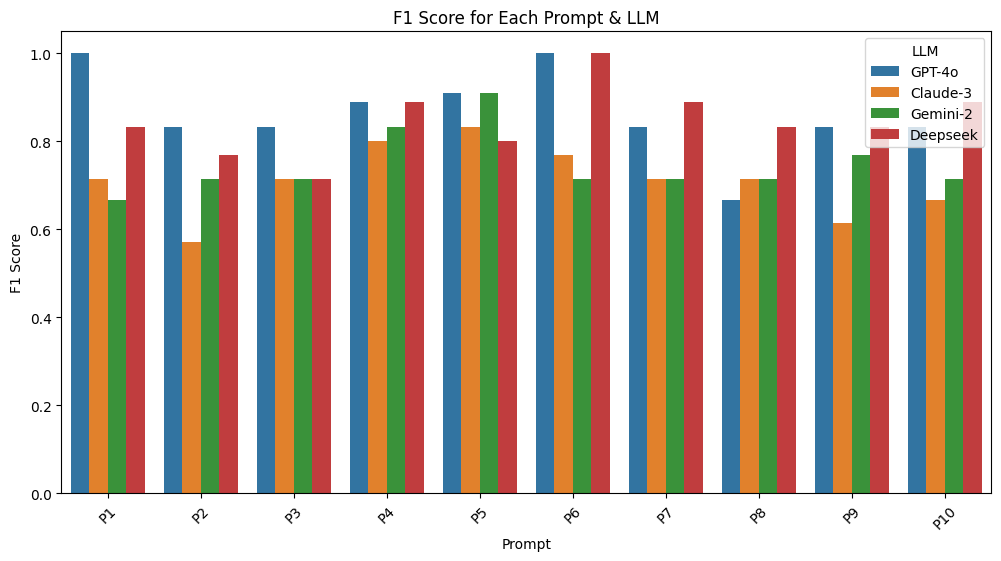

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x="Prompt", y="F1 Score", hue="LLM")
plt.xticks(rotation=45)
plt.title("F1 Score for Each Prompt & LLM")
plt.legend(title="LLM")
plt.show()

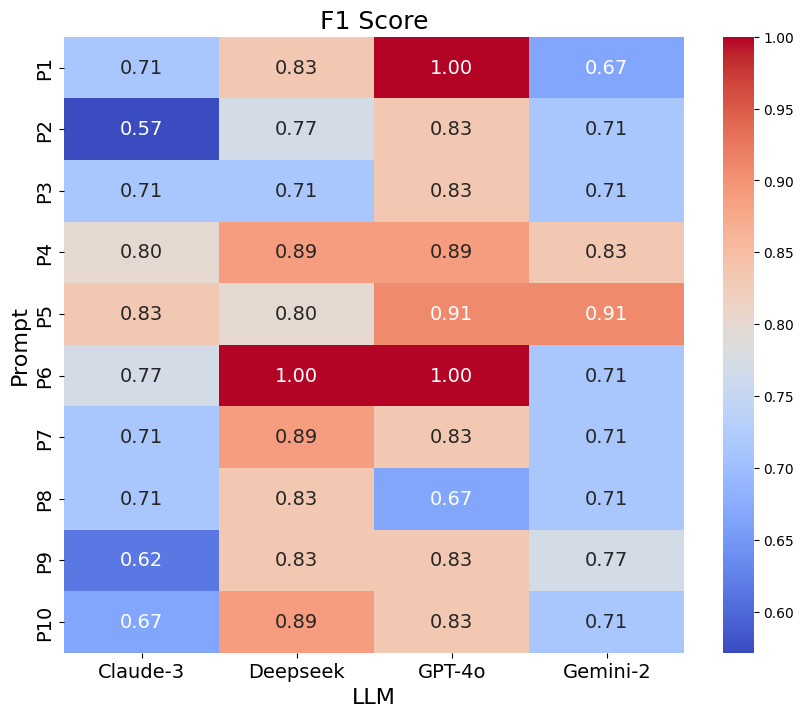

In [ ]:
# Convert Prompt column to a categorical type with correct numerical ordering
metrics_df["Prompt"] = pd.Categorical(metrics_df["Prompt"], 
                                      categories=sorted(metrics_df["Prompt"].unique(), 
                                                        key=lambda x: int(x[1:])), 
                                      ordered=True)

# Re-sort DataFrame based on the new categorical order
metrics_df = metrics_df.sort_values("Prompt")

# Create the heatmap again
pivot_df = metrics_df.pivot(index="Prompt", columns="LLM", values="F1 Score")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 14})  # Increase annotation size

# Increase font size for labels and title
plt.title("F1 Score", fontsize=18)
plt.xlabel("LLM", fontsize=16)
plt.ylabel("Prompt", fontsize=16)

# Adjust tick parameters for better visibility
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

C:\Users\iratx\AppData\Local\Temp\ipykernel_20944\1934429328.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_20944\1934429328.py:27: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20944\1934429328.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20944\1934429328.py:27: UserWarning: The palette lis

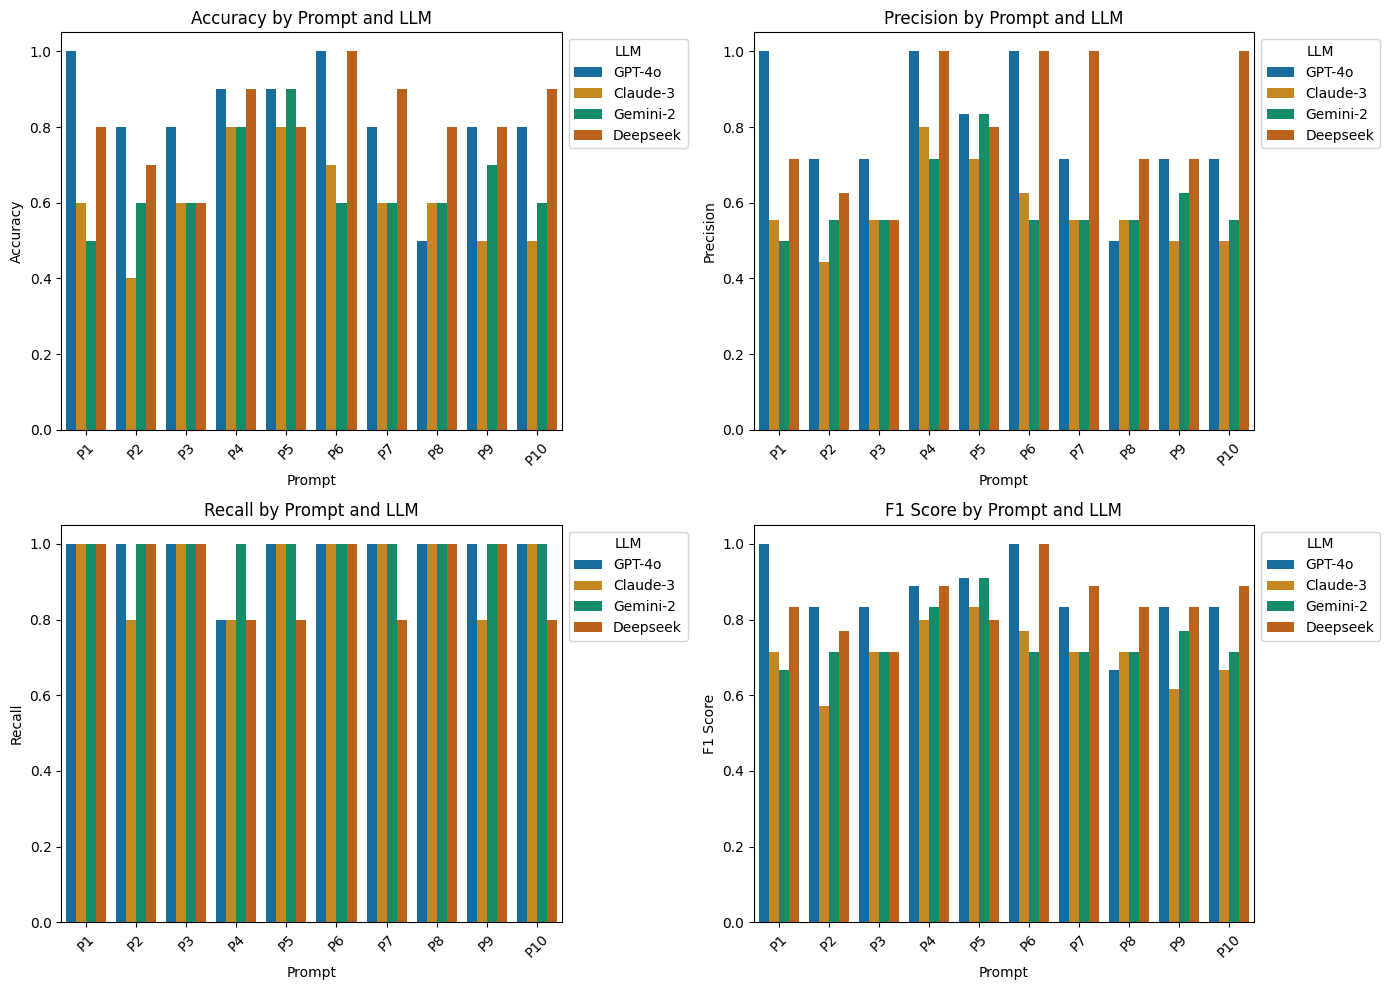

Mean scores per LLM:
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Claude-3      0.61   0.580595    0.94  0.711319
Deepseek      0.82   0.812341    0.92  0.845018
GPT-4o        0.83   0.790476    0.98  0.863131
Gemini-2      0.65   0.600595    1.00  0.746404

Mean scores per Prompt:
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1         0.725   0.692460    1.00  0.803571
P2         0.625   0.584821    0.95  0.722070
P3         0.650   0.595238    1.00  0.744048
P4         0.850   0.878571    0.85  0.852778
P5         0.850   0.795238    0.95  0.862879
P6         0.825   0.795139    1.00  0.870879
P7         0.725   0.706349    0.95  0.787698
P8         0.625   0.581349    1.00  0.732143
P9         0.700   0.638393    0.95  0.762821
P10        0.700   0.692460    0.95  0.775794


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "preliminary_evaluation_results.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and LLM")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)
